In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')


In [5]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [7]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [9]:
data = pd.merge(customers, transactions, on='CustomerID', how='inner')

In [11]:
data.fillna(method='ffill', inplace=True)

In [15]:
data['TotalAmount'] = data.groupby('CustomerID')['Price'].transform('sum')
data['TransactionFrequency'] = data.groupby('CustomerID')['TransactionID'].transform('count')

In [19]:
features = ['Price', 'TotalAmount', 'TransactionFrequency']
X = data[features]

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
db_scores = []
silhouette_scores = []
for k in range(2, 11):  # Test for clusters between 2 and 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    db_index = davies_bouldin_score(X_scaled, clusters)
    silhouette_avg = silhouette_score(X_scaled, clusters)
    db_scores.append(db_index)
    silhouette_scores.append(silhouette_avg)
    print(f"Number of clusters: {k}, DB Index: {db_index}, Silhouette Score: {silhouette_avg}")



Number of clusters: 2, DB Index: 1.0650633666569462, Silhouette Score: 0.3711380124744072
Number of clusters: 3, DB Index: 0.9868811930601359, Silhouette Score: 0.3381094817825265
Number of clusters: 4, DB Index: 0.9564735798477174, Silhouette Score: 0.3679856374216399
Number of clusters: 5, DB Index: 0.966831877847053, Silhouette Score: 0.34230937271849055
Number of clusters: 6, DB Index: 0.9668364609659523, Silhouette Score: 0.3172624319153384
Number of clusters: 7, DB Index: 1.0364751005948298, Silhouette Score: 0.2862948379756318
Number of clusters: 8, DB Index: 0.9646215565417525, Silhouette Score: 0.31472927503520587
Number of clusters: 9, DB Index: 1.0126887807433234, Silhouette Score: 0.3210688076618203
Number of clusters: 10, DB Index: 0.9829418383523596, Silhouette Score: 0.32676849240104444


In [27]:
optimal_clusters = np.argmin(db_scores) + 2  
print(f"Optimal number of clusters: {optimal_clusters}")


Optimal number of clusters: 4


In [29]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
final_clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = final_clusters


In [31]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]


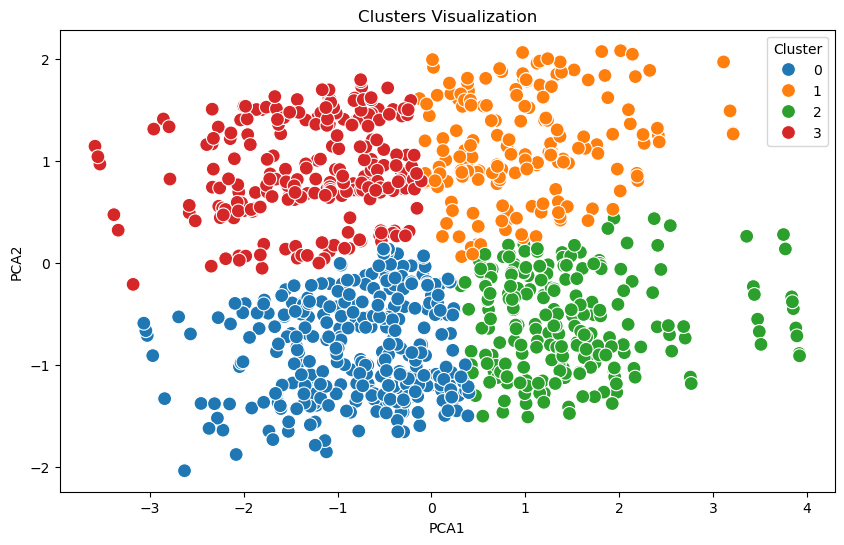

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='tab10', s=100)
plt.title('Clusters Visualization')
plt.show()

In [35]:
print("Final DB Index:", davies_bouldin_score(X_scaled, final_clusters))
print("Final Silhouette Score:", silhouette_score(X_scaled, final_clusters))

Final DB Index: 0.9564735798477174
Final Silhouette Score: 0.3679856374216399
